In [1]:
#Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
plt.ioff()

In [2]:
X = np.random.randn(100, 2)

In [3]:
M = .3
C = .1
cls = np.array(M*X[:,0] - X[:,1] + C > 0, dtype=np.int)

In [98]:
cls

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

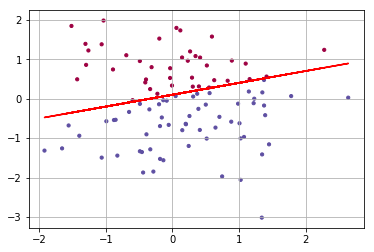

In [4]:
plt.scatter(X[:,0], X[:, 1], s=10, c=cls, cmap=plt.cm.Spectral)
plt.plot(X[:,0], M*X[:,0]+C, 'r')
plt.grid()

In [95]:

class LogisticRegression:
    def __init__(self, data, labels, num_steps=1000, learning_rate=.001):
        self.data = data
        self.labels = labels
        self.num_steps = num_steps
        self.learning_rate = learning_rate
        self.num_samples = self.data.shape[0]
        self.data_dim = self.data.shape[1]
        self.weights = {'W': np.random.randn(self.data_dim, ), 'b': np.zeros(1)}
        
    @staticmethod
    def sigmoid(z):
        return 1./np.exp(1+np.exp(-z))

    def forward_prop(self):
        z = self.data.dot(self.weights['W']) + self.weights['b']
        y_hat = self.sigmoid(z)
        y = self.labels
        N = self.num_samples
        loss = -np.sum(y*np.log(y_hat) - (1-y)*np.log(1-y_hat))/N
        return y_hat, loss

    def back_prop(self, y_hat):
#         y_hat = y_hat[:,0]
        dz = y_hat - self.labels
#         print(y_hat.shape, self.labels.shape, dz.shape,self.data.shape, 'SHAPES')
        dW = self.data.T.dot(dz)
        db = np.mean(dz, axis=0)
#         print(dW.shape, db.shape, 'SHAPES')
        return {'dW': dW, 'db': db}

    def fit(self):
        i = 0
        while i<self.num_steps and i<100:
            Y_hat, loss = self.forward_prop()
            dtheta = self.back_prop(Y_hat)
            dW, db = dtheta['dW'], dtheta['db']
#             print(self.weights['W'].shape, self.weights['b'].shape, dW.shape, db.shape, 'SHAPESFIT')
            self.weights['W']-=self.learning_rate*dW
            self.weights['b']-=self.learning_rate*db
#             if i%100==0:
            print('Loss=%f at %ith iteration' %(loss, i), Y_hat[0])
            i+=1

    def predict(self, x):
        return self.weights['W']*x + self.weights['b']

In [96]:
regressor = LogisticRegression(data=X, labels=cls)

In [97]:
regressor.fit()

Loss=1.375254 at 0th iteration 0.3575335346798687
Loss=1.353874 at 1th iteration 0.35789101786841027
Loss=1.333365 at 2th iteration 0.3582355018242006
Loss=1.313681 at 3th iteration 0.35856750383664876
Loss=1.294782 at 4th iteration 0.3588875180230532
Loss=1.276628 at 5th iteration 0.35919601652615557
Loss=1.259184 at 6th iteration 0.35949345063021193
Loss=1.242415 at 7th iteration 0.3597802518030618
Loss=1.226287 at 8th iteration 0.36005683267156174
Loss=1.210771 at 9th iteration 0.3603235879373154
Loss=1.195836 at 10th iteration 0.36058089523898135
Loss=1.181456 at 11th iteration 0.36082911596666645
Loss=1.167604 at 12th iteration 0.36106859603309865
Loss=1.154257 at 13th iteration 0.3612996666054903
Loss=1.141391 at 14th iteration 0.3615226448012914
Loss=1.128984 at 15th iteration 0.3617378343504224
Loss=nan at 16th iteration 0.36194552622607395
Loss=nan at 17th iteration 0.3621459992457697
Loss=nan at 18th iteration 0.36233952064408503
Loss=nan at 19th iteration 0.3625263466182024


/Users/piyushsi/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  
/Users/piyushsi/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/Users/piyushsi/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply
